In [3]:
import pandas as pd

For each dataset include the following information
- Dataset #1
  - Dataset Name: results.csv, races.csv, circuits.csv are all taken from "Formula 1 World Championship (1950 - 2024)"
  - Link to the dataset: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data
  - Number of observations: 26519(when imported), 1125, 77 respectively.
  - Number of variables: 18(when imported), 18, 9 respectively.

# Importing Results.csv



In [4]:
#Load results.csv
results_df = pd.read_csv('F1Data/results.csv')

#output
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [5]:
#Dropping columns, i dropped which ones i thought were not important, did we need to drop 'rank' column?

# Keeping only the specified columns
results_df = results_df.filter(items=['resultId', 'raceId', 'driverId', 'grid', 'position', 'laps', 'rank'])

# Display the resulting DataFrame
results_df


,resultId,raceId,driverId,grid,position,laps,rank
0,1,18,1,1,1,58,2
1,2,18,2,5,2,58,3
2,3,18,3,7,3,58,5
3,4,18,4,11,4,58,7
4,5,18,5,3,5,58,1
...,...,...,...,...,...,...,...
26514,26520,1132,839,18,16,50,16
26515,26521,1132,815,0,17,50,6
26516,26522,1132,855,14,18,50,17
26517,26523,1132,847,1,\N,33,19


# Problems with results_df

In [6]:
# It seems like we won't be able to answer this question due to lack of data:
# - Lap 1 Leader: Person that led the race after lap 1

#rows where laps is 1 and position is 1
lap1_winner_df = results_df[(results_df['laps'] == 1) & (results_df['position'] == '1')]

#output
lap1_winner_df


,resultId,raceId,driverId,grid,position,laps,rank
25180,25186,1063,830,1,1,1,0


In [7]:
#Even using 'positionOrder' instead of 'position' on the original dataset will only get me one row for the first lap
#
results_df = pd.read_csv('F1Data/results.csv')
lap1_winner_df = results_df[(results_df['laps'] == 1)& (results_df['positionOrder'] == 1)]
lap1_winner_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25180,25186,1063,830,9,33,1,1,1,1,12.5,1,3:27.071,207071,\N,0,\N,\N,1


## Onto the next; importing races.csv, and circuits.csv, and combining them

In [8]:
#Load races.csv
races_df = pd.read_csv('F1Data/races.csv')

#output
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [9]:
#I kept what i thought were most important columns??

races_df = races_df.filter(items=['raceId', 'year', 'circuitId', 'name', 'date', 'time'])

# Display the resulting DataFrame
races_df


,raceId,year,circuitId,name,date,time
0,1,2009,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,4,Spanish Grand Prix,2009-05-10,12:00:00
...,...,...,...,...,...,...
1120,1140,2024,32,Mexico City Grand Prix,2024-10-27,20:00:00
1121,1141,2024,18,São Paulo Grand Prix,2024-11-03,17:00:00
1122,1142,2024,80,Las Vegas Grand Prix,2024-11-23,06:00:00
1123,1143,2024,78,Qatar Grand Prix,2024-12-01,17:00:00


In [10]:
#Load circuits.csv
circuits_df = pd.read_csv('F1Data/circuits.csv')

#output
circuits_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


In [11]:
# Drop the 'url' column, what else could we drop? did we need 'country', 'alt' column?
circuits_df = circuits_df.drop(columns=['url', 'country', 'alt'])

#output
circuits_df

,circuitId,circuitRef,name,location,lat,lng
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,-37.84970,144.96800
1,2,sepang,Sepang International Circuit,Kuala Lumpur,2.76083,101.73800
2,3,bahrain,Bahrain International Circuit,Sakhir,26.03250,50.51060
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,41.57000,2.26111
4,5,istanbul,Istanbul Park,Istanbul,40.95170,29.40500
...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,37.22700,-8.62670
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,43.99750,11.37190
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,21.63190,39.10440
75,78,losail,Losail International Circuit,Al Daayen,25.49000,51.45420


In [12]:
#merged the two dataframes together
races_circuits_df = pd.merge(races_df, circuits_df, on='circuitId')
races_circuits_df

,raceId,year,circuitId,name_x,date,time,circuitRef,name_y,location,lat,lng
0,1,2009,1,Australian Grand Prix,2009-03-29,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,-37.84970,144.96800
1,2,2009,2,Malaysian Grand Prix,2009-04-05,09:00:00,sepang,Sepang International Circuit,Kuala Lumpur,2.76083,101.73800
2,3,2009,17,Chinese Grand Prix,2009-04-19,07:00:00,shanghai,Shanghai International Circuit,Shanghai,31.33890,121.22000
3,4,2009,3,Bahrain Grand Prix,2009-04-26,12:00:00,bahrain,Bahrain International Circuit,Sakhir,26.03250,50.51060
4,5,2009,4,Spanish Grand Prix,2009-05-10,12:00:00,catalunya,Circuit de Barcelona-Catalunya,Montmeló,41.57000,2.26111
...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,32,Mexico City Grand Prix,2024-10-27,20:00:00,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,19.40420,-99.09070
1121,1141,2024,18,São Paulo Grand Prix,2024-11-03,17:00:00,interlagos,Autódromo José Carlos Pace,São Paulo,-23.70360,-46.69970
1122,1142,2024,80,Las Vegas Grand Prix,2024-11-23,06:00:00,vegas,Las Vegas Strip Street Circuit,Las Vegas,36.11470,-115.17300
1123,1143,2024,78,Qatar Grand Prix,2024-12-01,17:00:00,losail,Losail International Circuit,Al Daayen,25.49000,51.45420


# Analyzing what columns we could use to grab the weather on a date and location using races_circuits_df

In [13]:
#if we group by lat lng, it seems like we are missing a lot of values for the time column.
# so we might only be able to get the weather based on date column only for that day
unique_circuits_df = (
    races_circuits_df
    .groupby(['lat', 'lng'], as_index=False)
    .agg({
        'raceId': 'unique',
        'year': 'unique',
        'circuitId': 'unique',  
        'name_x': 'first',      
        'date': 'unique',       
        'time': 'unique',       
        'circuitRef': 'first',  
        'name_y': 'first',      
        'location': 'first'     
    })
)

unique_circuits_df

,lat,lng,raceId,year,circuitId,name_x,date,time,circuitRef,name_y,location
0,-37.8497,144.96800,"[1, 18, 36, 55, 71, 90, 108, 124, 141, 158, 17...","[2009, 2008, 2007, 2006, 2005, 2004, 2003, 200...",[1],Australian Grand Prix,"[2009-03-29, 2008-03-16, 2007-03-18, 2006-04-0...","[06:00:00, 04:30:00, 03:00:00, 14:00:00, \N, 0...",albert_park,Albert Park Grand Prix Circuit,Melbourne
1,-34.9272,138.61700,"[256, 272, 288, 304, 320, 336, 371, 387, 403, ...","[1995, 1994, 1993, 1992, 1991, 1990, 1989, 198...",[29],Australian Grand Prix,"[1995-11-12, 1994-11-13, 1993-11-07, 1992-11-0...",[\N],adelaide,Adelaide Street Circuit,Adelaide
2,-34.6943,-58.45930,"[193, 209, 226, 241, 485, 498, 512, 527, 543, ...","[1998, 1997, 1996, 1995, 1981, 1980, 1979, 197...",[25],Argentine Grand Prix,"[1998-04-12, 1997-04-13, 1996-04-07, 1995-04-0...",[\N],galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires
3,-33.0486,27.87360,"[699, 728, 737]","[1965, 1963, 1962]",[56],South African Grand Prix,"[1965-01-01, 1963-12-28, 1962-12-29]",[\N],george,Prince George Circuit,Eastern Cape Province
4,-25.9894,28.07670,"[273, 289, 434, 437, 466, 467, 500, 514, 529, ...","[1993, 1992, 1985, 1984, 1983, 1982, 1980, 197...",[30],South African Grand Prix,"[1993-03-14, 1992-03-01, 1985-10-19, 1984-04-0...",[\N],kyalami,Kyalami,Midrand
...,...,...,...,...,...,...,...,...,...,...,...
72,52.3888,4.54092,"[430, 448, 463, 475, 494, 508, 523, 539, 555, ...","[1985, 1984, 1983, 1982, 1981, 1980, 1979, 197...",[39],Dutch Grand Prix,"[1985-08-25, 1984-08-26, 1983-08-28, 1982-07-0...","[\N, 13:00:00]",zandvoort,Circuit Park Zandvoort,Zandvoort
73,52.4806,13.25140,[761],[1959],[61],German Grand Prix,[1959-08-02],[\N],avus,AVUS,Berlin
74,52.8306,-1.37528,[275],[1993],[31],European Grand Prix,[1993-04-11],[\N],donington,Donington Park,Castle Donington
75,53.4769,-2.94056,"[733, 742, 760, 780, 797]","[1962, 1961, 1959, 1957, 1955]",[58],British Grand Prix,"[1962-07-21, 1961-07-15, 1959-07-18, 1957-07-2...",[\N],aintree,Aintree,Liverpool


In [14]:
# Get all circuitId values to see if they are unique circuits
circuit_ids = unique_circuits_df['circuitId'].tolist()
circuit_ids

[array([1]),
 array([29]),
 array([25]),
 array([56]),
 array([30]),
 array([18]),
 array([36]),
 array([15]),
 array([2]),
 array([32]),
 array([77]),
 array([24]),
 array([78]),
 array([79]),
 array([3]),
 array([63]),
 array([68]),
 array([69]),
 array([17]),
 array([42]),
 array([33]),
 array([64]),
 array([43]),
 array([60]),
 array([35]),
 array([22]),
 array([28]),
 array([16]),
 array([80]),
 array([44]),
 array([26]),
 array([75]),
 array([62]),
 array([27]),
 array([12]),
 array([19]),
 array([73]),
 array([45]),
 array([5]),
 array([59]),
 array([49]),
 array([67]),
 array([4]),
 array([37]),
 array([46]),
 array([65]),
 array([34]),
 array([71]),
 array([6]),
 array([76]),
 array([48]),
 array([21]),
 array([7]),
 array([14]),
 array([51]),
 array([52]),
 array([8]),
 array([66]),
 array([57]),
 array([70]),
 array([41]),
 array([11]),
 array([54]),
 array([55]),
 array([10]),
 array([53]),
 array([20]),
 array([13]),
 array([50]),
 array([40]),
 array([38]),
 array([9]),
 

# NEW SECTION
Trying to answer this part:
We hypothesize that the likelihood of winning a race is highest for drivers who start in the top two (or front row)
grid positions and maintain the lead after the first lap,
especially on circuits with restricted overtaking opportunities,
like Monaco or the Hungaroring.

In [15]:
# Merge results_df with races_circuits_df 
merged_df = pd.merge(results_df, races_circuits_df[['raceId', 'circuitRef','year']], on='raceId')

#output
merged_df


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitRef,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,albert_park,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,albert_park,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,albert_park,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,albert_park,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,albert_park,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12,silverstone,2024
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12,silverstone,2024
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12,silverstone,2024
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34,silverstone,2024


In [16]:
#Filtering for restricted circuits like monaco and hungagoring
restricted_circuits = ['monaco', 'hungaroring']
restricted_df = merged_df[merged_df['circuitRef'].isin(restricted_circuits)]

#output
restricted_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitRef,year
108,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1,monaco,2008
109,110,23,9,2,4,5,2,2,2,8.0,76,+3.064,7245806,75,5,1:17.933,154.286,1,monaco,2008
110,111,23,13,6,2,1,3,3,3,6.0,76,+4.811,7247553,76,4,1:17.886,154.379,1,monaco,2008
111,112,23,17,9,10,9,4,4,4,5.0,76,+19.295,7262037,74,8,1:19.036,152.133,1,monaco,2008
112,113,23,20,5,15,19,5,5,5,4.0,76,+24.657,7267399,74,7,1:18.787,152.614,1,monaco,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26434,26440,1128,855,15,24,18,16,16,16,0.0,76,\N,\N,\N,0,\N,\N,12,monaco,2024
26435,26441,1128,839,214,31,11,\N,R,17,0.0,0,\N,\N,\N,0,\N,\N,4,monaco,2024
26436,26442,1128,815,9,11,16,\N,R,18,0.0,0,\N,\N,\N,0,\N,\N,4,monaco,2024
26437,26443,1128,807,210,27,19,\N,R,19,0.0,0,\N,\N,\N,0,\N,\N,4,monaco,2024


In [17]:
# Filtering for grid position 1,2 (front row) and people who won
front_row_winners = restricted_df[(restricted_df['grid'].isin([1, 2])) & (restricted_df['position'] == '1')]
front_row_winners

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitRef,year
208,209,28,5,1,23,2,1,1,1,10.0,70,1:37:27.067,5847067,19,7,1:21.753,192.917,1,hungaroring,2008
456,457,40,4,1,1,1,1,1,1,10.0,78,1:40:29.329,6029329,44,1,1:15.284,159.715,1,monaco,2007
588,589,46,1,1,2,1,1,1,1,10.0,70,1:35:52.991,5752991,13,2,1:20.171,196.724,1,hungaroring,2007
874,875,59,4,4,1,1,1,1,1,10.0,78,1:43:43.116,6223116,11,3,1:15.671,158.898,1,monaco,2006
1236,1237,76,8,1,9,1,1,1,1,10.0,78,1:45:15.556,6315556,41,2,1:15.921,158.375,1,monaco,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24660,24666,1033,1,131,44,1,1,1,1,26.0,70,1:36:12.473,5772473,70,1,1:16.627,205.823,1,hungaroring,2020
25041,25046,1056,830,9,33,2,1,1,1,25.0,78,1:38:56.820,5936820,58,6,1:14.649,160.929,1,monaco,2021
25940,25946,1104,830,9,1,1,1,1,1,25.0,78,1:48:51.980,6531980,23,7,1:16.604,156.822,1,monaco,2023
26040,26046,1109,830,9,1,2,1,1,1,26.0,70,1:38:08.634,5888634,53,1,1:20.504,195.910,1,hungaroring,2023


In [18]:
#Number of front-row wins
front_row_wins = front_row_winners.shape[0]

#Total number of races in the restricted circuits dataframe
total_restricted_races = restricted_df['raceId'].nunique()

#Total number of wins for non-front-row starters
non_front_row_winners = restricted_df[(~restricted_df['grid'].isin([1, 2])) & (restricted_df['position'] == '1')]
non_front_row_wins = non_front_row_winners.shape[0]

# Calculate percentages of wins
front_row_win_percentage = (front_row_wins / total_restricted_races) * 100
non_front_row_win_percentage = (non_front_row_wins / total_restricted_races) * 100

# Display the results
front_row_wins, non_front_row_wins, total_restricted_races, front_row_win_percentage, non_front_row_win_percentage


(71, 37, 108, 65.74074074074075, 34.25925925925926)

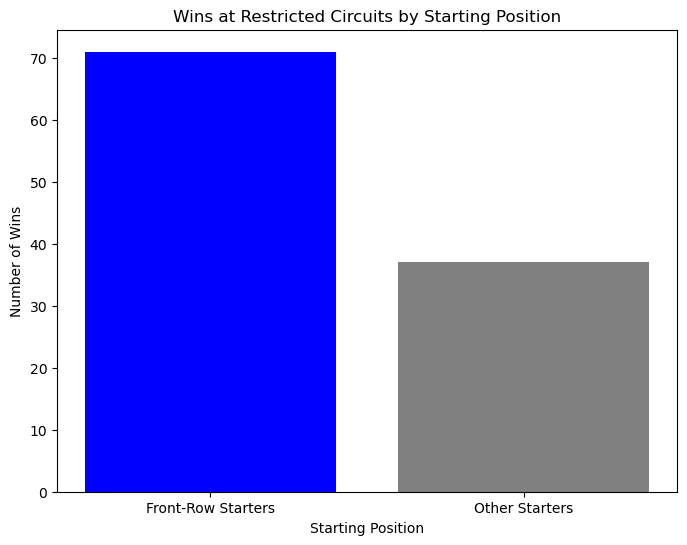

In [19]:
#below is obviously chatgpt lol
import matplotlib.pyplot as plt

# Plot win counts for front-row vs other starters
plt.figure(figsize=(8, 6))
plt.bar(['Front-Row Starters', 'Other Starters'], [front_row_wins, non_front_row_wins], color=['blue', 'gray'])
plt.title("Wins at Restricted Circuits by Starting Position")
plt.xlabel("Starting Position")
plt.ylabel("Number of Wins")
plt.show()


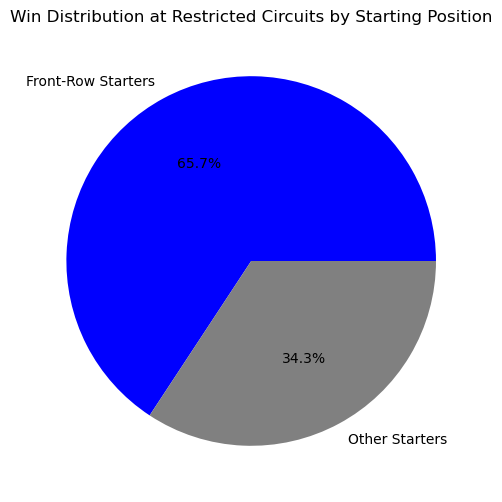

In [20]:
# Pie chart of win distribution between front-row and non-front-row starters
plt.figure(figsize=(8, 6))
plt.pie([front_row_wins, non_front_row_wins], labels=['Front-Row Starters', 'Other Starters'], autopct='%1.1f%%', colors=['blue', 'gray'])
plt.title("Win Distribution at Restricted Circuits by Starting Position")
plt.show()


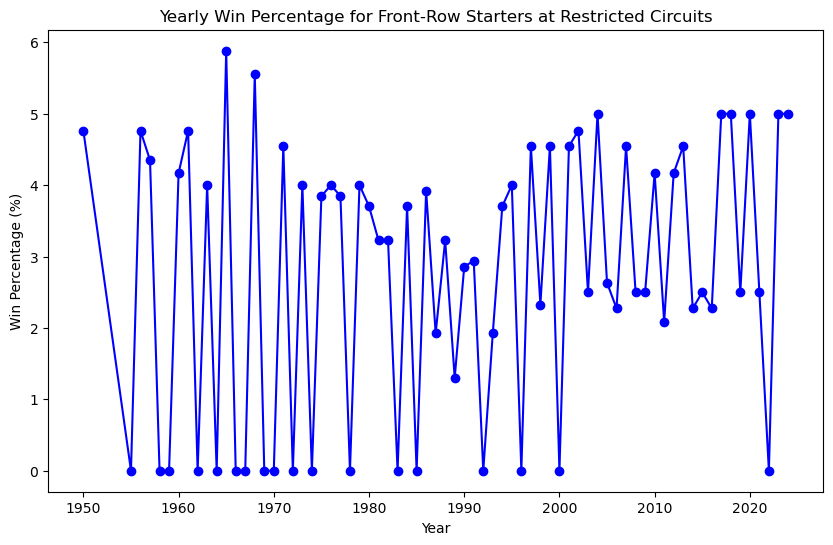

In [21]:
# Calculate yearly win percentage for front-row starters at restricted circuits
yearly_wins = front_row_winners.groupby('year').size()
yearly_race_counts = restricted_df.groupby('year').size()
yearly_win_percentage = (yearly_wins / yearly_race_counts * 100).fillna(0)

# Plot yearly win percentage
plt.figure(figsize=(10, 6))
plt.plot(yearly_win_percentage.index, yearly_win_percentage.values, marker='o', color='blue')
plt.title("Yearly Win Percentage for Front-Row Starters at Restricted Circuits")
plt.xlabel("Year")
plt.ylabel("Win Percentage (%)")
plt.show()
